# Week 10: Pre-Class Assignment: Clustering

### <p style="text-align: right;"> &#9989; Kyle Taft
 
![fe1](https://static.commonlounge.com/fp/600w/hJWa59Ukh7Twci8VzvZdGYFi01520486363_kc)

![fe2](https://www.kdnuggets.com/wp-content/uploads/feature-engineering-fig1-1.jpg)


### Goals of this assignment 

There are three logical parts to this HW and two due dates. The parts are:

1. feature creation and selection: there were many great questions about this, so let's each work through a simple example,
2. clustering, since that is the subject of this week,

Total number of points: **54 points**

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-Class Assignments" submission folder on D2L.  Submission instructions can be found at the end of the notebook.

---
## Part 0: Reading

Read chapter 9 of your textbook. Read through questions 1 - 13 at the end of the chapter

If you have any questions about anything in that chapter please contact me.  Or, if you found anything particularly interesting, let me know that as well! 

---
## Part 1: More and More Features (28 points)

In this next portion of the PCA, we will explore two key ideas in Machine Learning that are not necessarily related to this week's topic of clustering. But, these three ideas are central to any ML workflow. 

These two topics are:

1. _feature engineering_: creating _more_ new features that help the ML find patterns,
2. _feature ranking_: determining which features have the most impact.

Next week, we will examine the opposite:

* _dimensionality reduction of features_: find new, but _fewer_, features. 

As we will see, these three ideas are closely related and can be used together or even viewed as opposing ideas (creating more features versus dropping features). 

We'll use a somewhat boring example of linear regression in 1D so that everything is easy to understand and visualize, but the ideas are very general and obviously much more interesting for more complex data. 

Let's make some fake data first.

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

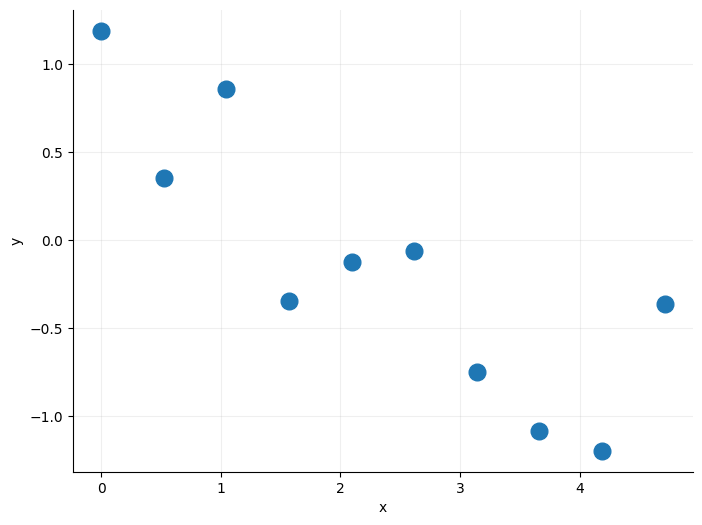

In [136]:
# Let's display them

def complicated_unknown_model(x,a,b, c):
    return a * np.cos(x) + b *np.sin(-x) + c*np.random.randn( len(x))

num_points = 10
x = np.linspace(0, 1.5*np.pi, num_points) 
a, b, ns = 1.2, -0.3, 0.6

y = complicated_unknown_model(x, a,b,ns) 

fig, ax = plt.subplots(1,1, figsize =(8,6) )
ax.plot(x, y, 'o', markersize=12, label = 'Noise Data')
ax.grid(alpha=0.2)
_ = ax.set( xlabel ="x", ylabel ="y")

Next, we are going to put this through linear regression. 

Make sure you understand these steps. Add comments to the code if you need. 

In [137]:
X = x.reshape(-1,1)
lin_reg_obj = LinearRegression().fit(X,y)
lin_reg_obj.score(X,y) # R^2

0.7041361190192482

As you can see, the score isn't all that great. Let's plot the prediction to see what the issue is.

&#9989; **Task: (4 points)** Get the [coefficients](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and plot the prediction of the linear model together with the data.

Coefs:  [-0.41344455]
Intercept:  0.8217825962974412


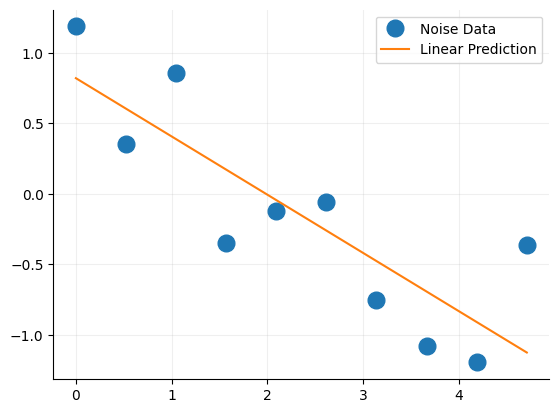

In [138]:
# the data with my linear prediction
print("Coefs: ", lin_reg_obj.coef_)
print("Intercept: ", lin_reg_obj.intercept_)
y_pred = lin_reg_obj.predict(X)
plt.plot(x, y, 'o', markersize=12, label = 'Noise Data')
plt.plot(x, y_pred, label = 'Linear Prediction')
plt.grid(alpha=0.2)

plt.legend()


### Part 1.2: Polynomial Features (15 points)

Maybe if we had more features, this would work better? 

&#9989; **Task: (2 points)** Next, read [this](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) and extend your intial dataset to include features up to $X^3$ and finally print the new transformed dataset.

This preprocessing step is just one way to make more features; you wouldn't always want to use a polynomial approach, but it is very often a great start if you have nothing else to guide you. You may want to do this for your project, so be sure you know what is happening here. 

In [139]:
# Put your code here
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
X_poly



array([[  1.        ,   0.        ,   0.        ,   0.        ],
       [  1.        ,   0.52359878,   0.27415568,   0.14354758],
       [  1.        ,   1.04719755,   1.09662271,   1.14838062],
       [  1.        ,   1.57079633,   2.4674011 ,   3.87578459],
       [  1.        ,   2.0943951 ,   4.38649084,   9.18704494],
       [  1.        ,   2.61799388,   6.85389195,  17.94344715],
       [  1.        ,   3.14159265,   9.8696044 ,  31.00627668],
       [  1.        ,   3.66519143,  13.43362821,  49.23681899],
       [  1.        ,   4.1887902 ,  17.54596338,  73.49635954],
       [  1.        ,   4.71238898,  22.2066099 , 104.6461838 ]])

&#9989; **Questions: (1 point)** What do the rows and columns of your new dataset correspond to?

Each row is a data point. The columns are: $x^0$, $x^1$, $x^2$, and $x^3$.

&#9989; **Task: (2 points)** Perform the linear regression again with your expanded dataset and check the new score using the increased number of features. 

0.8095839265083095
Coefs:  [ 0.         -0.28372984 -0.2421333   0.04892337]


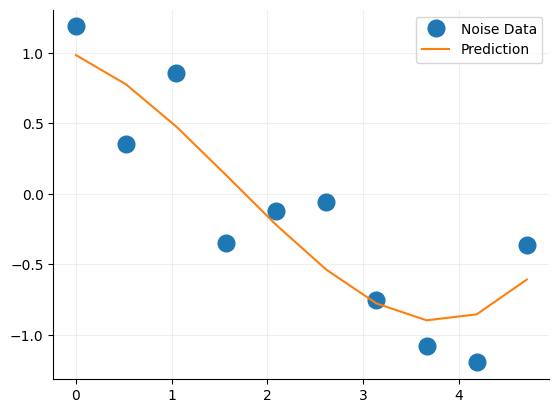

In [140]:
# Put your code here
poly_reg_obj = LinearRegression().fit(X_poly,y)
print(poly_reg_obj.score(X_poly,y)) # R^2

# the data with my linear prediction
print("Coefs: ", poly_reg_obj.coef_)

y_pred = poly_reg_obj.predict(X_poly)
plt.plot(x, y, 'o', markersize=12, label = 'Noise Data')
plt.plot(x, y_pred, label = 'Prediction')
plt.grid(alpha=0.2)
plt.legend()

Did your score improve? Do you think we should stop here and be done? Of course not.

&#9989; **Task: (6 points)** Re-run your linear model by adding features for polynomials up to order 10 (step by 1). The make two plots: one showing the original data with the prediction of each model and one showing the score versus the order of the polynomial. **Don't forget plot axis labels, and legends**

Text(0.5, 1.0, '$R^2$ vs. Order')

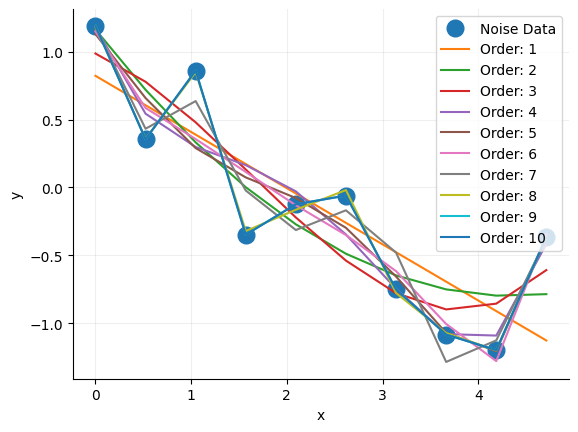

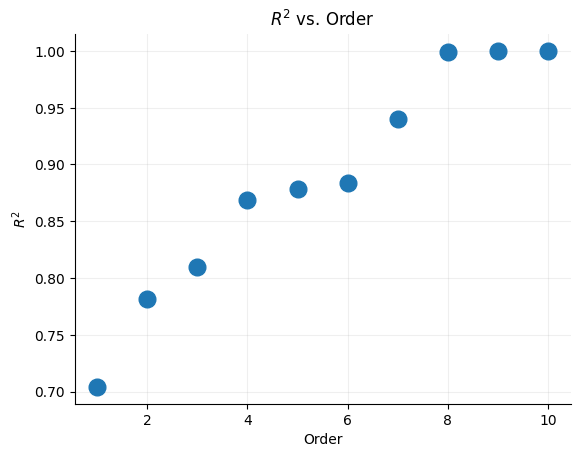

In [141]:
plt.figure()
plt.plot(x, y, 'o', markersize=12, label = 'Noise Data')
plt.grid(alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
R = []
for order in range(1,11,1):
    poly = PolynomialFeatures(degree=order) # Create order-th polynomial

    X_poly = poly.fit_transform(X)
    poly_reg_obj = LinearRegression().fit(X_poly,y) # Fit

    R.append(poly_reg_obj.score(X_poly,y)) # Calculate R^2
    y_pred = poly_reg_obj.predict(X_poly) # Predict

    plt.plot(x, y_pred, label = 'Order: ' + str(order)) # Plot
    
plt.legend()

plt.figure()
plt.plot(range(1,11,1), R, 'o', markersize=12, label = 'Noise Data')
plt.grid(alpha=0.2)
plt.xlabel('Order')
plt.ylabel('$R^2$')
plt.title('$R^2$ vs. Order')

What we have done is create a higher-dimensional feature space. Because we have more features, it is harder to plot our prediction in terms of those features. **But**, this is **not** what we want to do anyway. We want use these features as terms in a polynomial and make a plot just like we did to start with!! 

&#9989; **Task: (4 points)** With this working, loop over different noise levels and polynomial orders and calculate the score for each. Then make two plots: one showing the score vs the polynomial order at different noise levels and one plot showing the scores vs the noise level at different polynomial orders. **Don't forget the axis' labels and plot legends** Be creative with the visualization


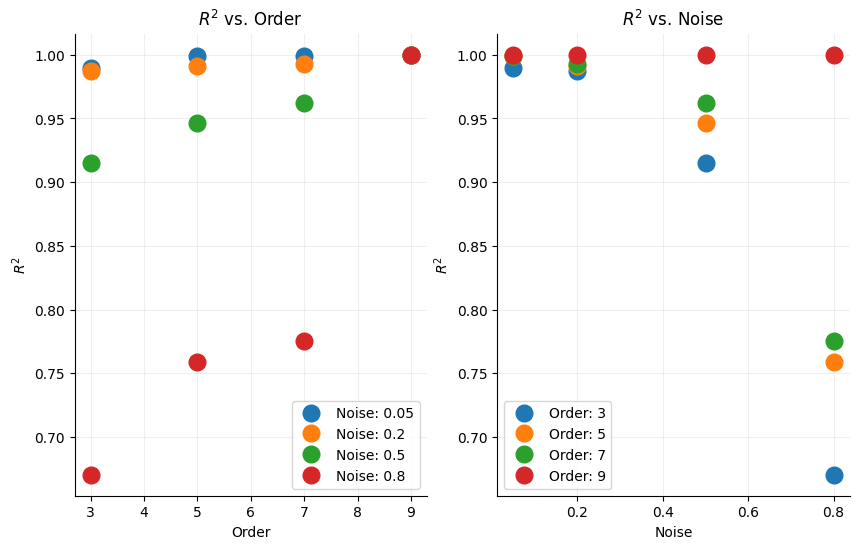

In [142]:
orders = [3, 5, 7, 9]
noise = [ 0.05, 0.2, 0.5, 0.8]
scores = np.zeros( (len(noise), len(orders)) )

for i, n in enumerate(noise):
    y = complicated_unknown_model(x, a, b ,n) # Create noisy data
    for j, order in enumerate(orders):
        poly = PolynomialFeatures(degree=order) # Create order-th polynomial
        X_poly = poly.fit_transform(X)
        poly_reg_obj = LinearRegression().fit(X_poly,y)
        scores[i,j] = poly_reg_obj.score(X_poly,y) # Calculate R^2

plt.subplots(1,2,figsize = (10,6))

# Score vs Order
plt.subplot(1,2,1)
plt.xlabel('Order')
plt.ylabel('$R^2$')
plt.title('$R^2$ vs. Order')
for i, row in enumerate(scores):
    plt.plot(orders, row, 'o', markersize=12, label = 'Noise: ' + str(noise[i]))
plt.grid(alpha=0.2)
plt.legend()

# Score vs Noise
plt.subplot(1,2,2)
plt.xlabel('Noise')
plt.ylabel('$R^2$')
plt.title('$R^2$ vs. Noise')
for i, row in enumerate(scores.T):
    plt.plot(noise, row, 'o', markersize=12, label = 'Order: ' + str(orders[i]))
plt.grid(alpha=0.2)
plt.legend()










Ok, at this point you know how to systematically create more, new features using the ones you were given. You don't need to make polynomial features, of course, and your insight into your application might suggest something else. 

I'll give you an example from experience. I was once creating lots of features and found that certain curves were very challenging to model even with _many_ polynomial features. Shouldn't very high polynomials always work? Even if they work in principle, there may be cases where they are extremely inefficient. Imagine if the data were created from 
$$f(x) = \frac{A}{1 + x^B}.$$
This is hard to model with an polynomial; but, we now know how to use this information as a new input feature! 

And, you should note that this is not limited to regression: you could also do this with classification. Again, see the pictures at the top of this notebook.

You should have noticed that the `.score` tends to improve as you add more features, but with the risk of overfitting. Quick caveat on overfitting...


#### Regularization Caveat

To keep this PCA not too long, we will not do the obvious, which is to explore _regularization_ to control overfitting. But, we did this last week so you could try and explore that here 
_____

We have seen that making more features is better. You might recall this really helped when we played with the [neural network playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.43912&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). But, we have no way (yet) to know which features are best or if we even need all of them - maybe we are creating more than we need? 

---
### Part 1.3: Recursive Feature Elimination (RFE) (13 points)

Next, consider these two scenarios:

1. you don't have many features, and they aren't working well; you do something like the above to create a lot of new features, but you want to get rid of those new features that are not helping and/or you are interested in which were the most useful,

2. you have a dataset with a lot of features, perhaps hundreds, and they are really slowing down your ML `.fit`s, your hyperparameter tuning and so on - you would like to know which of your hundreds of features are doing most of the work so that you can get rid of the rest and not melt your laptop. 

These situations are so common in ML that there are `sklearn` libraries to help you. Go to [this webpage](https://scikit-learn.org/stable/modules/feature_selection.html) and see what is there. In particular, read about `VarianceThreshold` - this is intuitive and easy to use. Here, however, we will examine [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE). Read its webpage to get familiar with it. 

RFE is an interesting library: to use it, you pass it the estimator. This is because RFE will run your ML many times for you with different features as it tries to figure out which ones matter. As you can imagine, this can take a while for large datasets. 

Let's try it....

&#9989; **Task: (4 points)** Run the `RFE` with the `LinearRegression` model using the transformed dataset with polynomial features of order 10. Then print out the ranking. 

In [143]:
from sklearn.feature_selection import RFE

# Put your code here
poly = PolynomialFeatures(degree=15)
X_poly = poly.fit_transform(X)

poly_reg_obj = LinearRegression()
selector = RFE(poly_reg_obj, n_features_to_select=1, step=1)
selector.fit(X_poly, y)
selector.ranking_

array([16,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

&#9989; **Questions: (5 point)** 

1. Which feature is the most important? What power does it correspond to?
   
2. Vary the arguments in the function calls in this code until you understand how to use it. Then, open a markdown and answer these questions:
    * what does `ranking_` give you?
    * what does `n_features_to_select` do? 
    * what is `step` for and what if you change it? 
    * which feature tends to always be the least useful, and why?

Be sure to try this with many polynomials of varying order so that you don't convince yourself of something that is only true for one case. And, feel free to change the properties of the fake data - since you have all of this coded in front of you, might as well play with it. 

1. The most important feature is the linear feature, $x^1$.

2. `ranking_` gives you the ranking of the features. The most important feature is ranked 1.
3. `n_features_to_select` is the number of features to select. 
4. `step` is the number of features to remove at each iteration. 
5. The bias feature is the least useful. This is because it has 0 variance since it is a constant.

&#9989; **Task: (4 points)** Your final step. Take all of the code you have above and check to see if RFE is doing what you think. That is, take the output of RFE and drop different features (columns of your updated dataset) and check that RFE is giving you good information. 

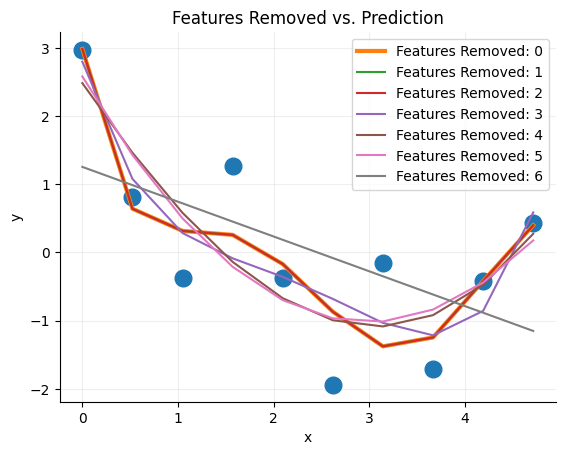

In [144]:
# Put your code here
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

poly_reg_obj = LinearRegression()
selector = RFE(poly_reg_obj, n_features_to_select=1, step=1)
selector.fit(X_poly, y)

plt.figure()
plt.plot(x, y, 'o', markersize=12)
plt.grid(alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Features Removed vs. Prediction')

poly_reg_obj.fit(X_poly,y)
y_pred = poly_reg_obj.predict(X_poly)

plt.plot(x, y_pred, label = 'Features Removed: ' + str(0), linewidth = 3) # Plot

for i in range(len(selector.ranking_)):
    rankings = np.argsort(selector.ranking_)[::-1] # Get the ranking of the features in decreasing order
    drop_cols = rankings[:i] # Drop the last i features
    X_poly = poly.fit_transform(X)
    X_poly = np.delete(X_poly, drop_cols, axis=1) # Delete the features
    poly_reg_obj = LinearRegression().fit(X_poly,y) # Fit
    y_pred = poly_reg_obj.predict(X_poly) # Predict

    plt.plot(x, y_pred, label = 'Features Removed: ' + str(i+1)) # Plot


plt.legend()

---
## Part 2: Examining Clustering Algorithms (with labeled data - _shhh!!_) (26 points)

What you will do in this portion of the assignment is answer this question: which clustering method that was discussed in the lecture is best at figuring out how many species of penguins there are in a dataset.

That is, do physical measurements of penguins cluster in way that we can spot the number of different species, if we didn't know it already? 

That is, if we only use:
* bill_length_mm 
* bill_depth_mm 
* flipper_length_mm 
* body_mass_g_, 

can we figure out how many penguin species there are? 


We will use the penguin dataset we have used before. Recall that we used this for classification, so we know the answer - we just won't use it other than to see how well clustering works on its own without the labels. 

What you will do:
1. pick 2 clustering algorithms: we discussed four in class (DBSCAN, KMeans)
2. you will score these in two ways: visual inspection (since we actually do have labels) and using the [silouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
3. perform the clustering in 2D and 4D:
  * 2D: pick two of the columns and treat that as 2D -- this allows you to make scatter plots, and you can compare the predicted clusters with a plot colored by the known answer
  * 4D: here, you can't easily visualize the clusters, but you can examine the silhouette score and compare it to what you got in 2D.

From a feature engineering perspective, which columns tend to be best at finding the number of clusters/species? For example, if you do this in 2D and get silhouette scores, which two columns get closest to predicting that there are three clusters? What if you use three columns? Four? You can see how the feature engineering done above is connected to unsupervised clustering. 


In [145]:
import seaborn as sns

penguin_df = sns.load_dataset("penguins").dropna()
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


By doing some EDA first, you can see how much clustering there is. Of course, for this HW, we are cheating because we can add color labels by species. 

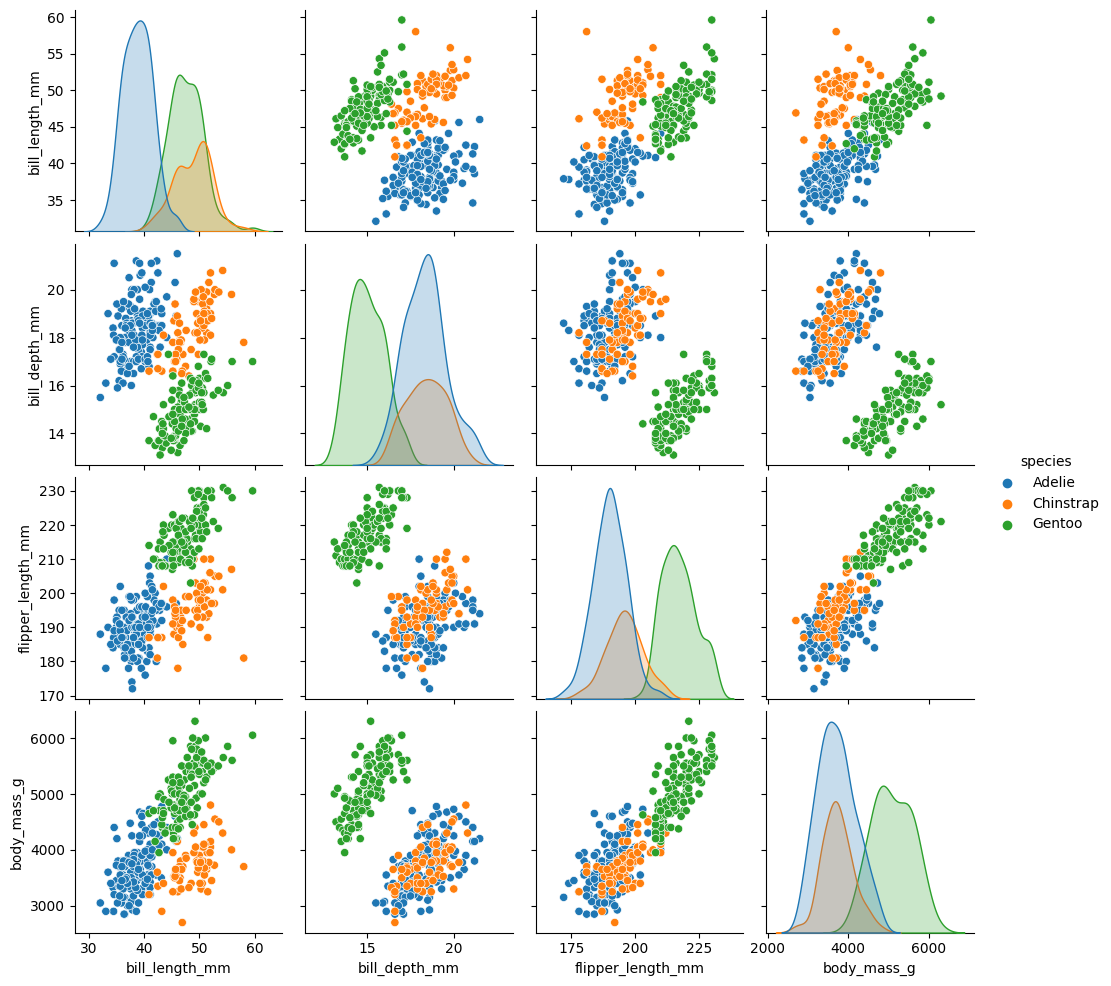

In [146]:
# sns.pairplot(penguin_df, hue="island")
sns.pairplot(penguin_df, hue="species")

Now, let's do EDA from an unsupervised perspective by removing the hues. This will reveal to us the difference between supervised and unsupervised learning! 

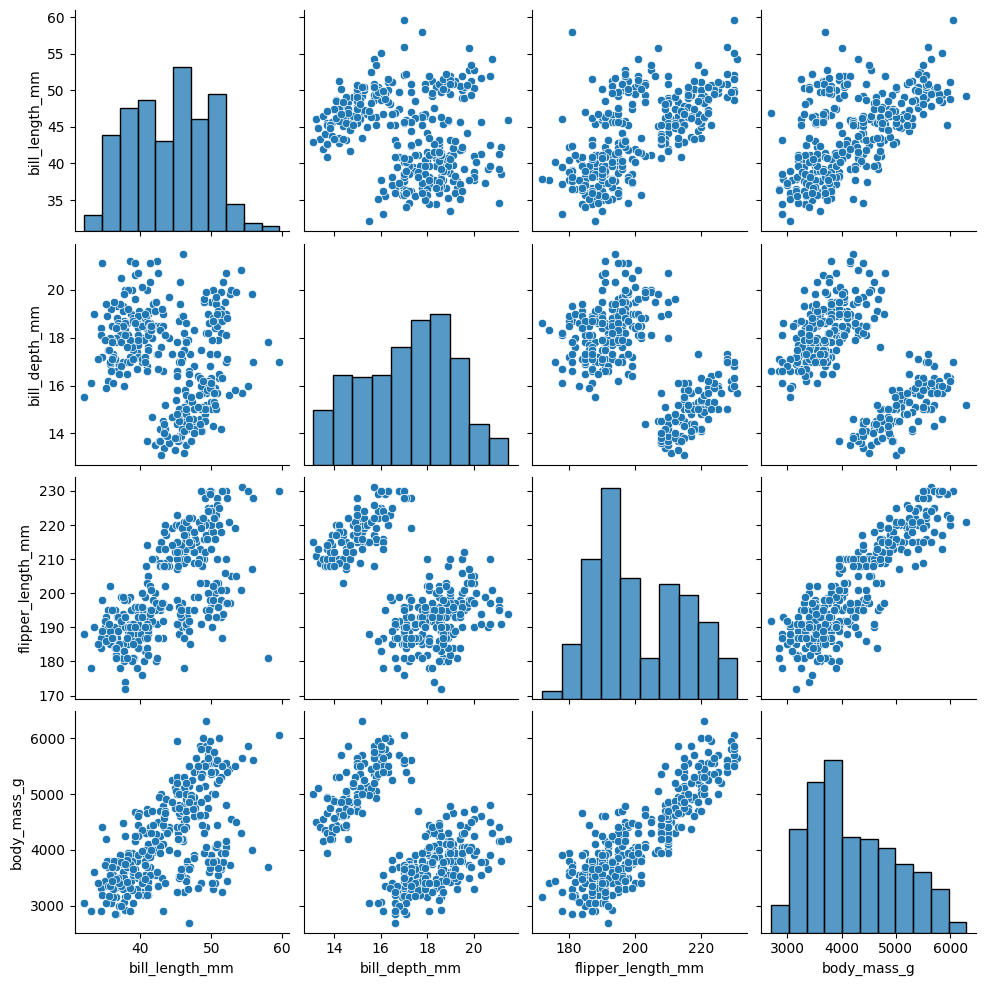

In [147]:
sns.pairplot(penguin_df)

Not as easy! 

EDA without hues quickly reveals to us the most likely number of clusters we might find if we used only pairs of inputs.

You are now on your own. Given this dataframe, extract the columns without the labels (bill_length_mm,	bill_depth_mm,	flipper_length_mm,	body_mass_g), put those into arrays, pass that to the clustering libraries and get scores. (Don't forget steps like scaling...)

Can you tell how many penguins species there are using just clustering? 


&#9989; **Task: (8 points)** Select two features of the penguins dataframe and use K-Means and DBSCAN to find clusters. 

- (4 points) K-Means: Make plots showing the Voronoi cells for k = [2, 3, 4] similar to the one in Fig 9-7 of your textbook (pg. 270). Look for the code in the book's github repo or look at [this code](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#visualize-the-results-on-pca-reduced-data) to help you make the plot. **Make sure to indicate the center of the clusters. Label your axis and add titles.**
- (4 points) DBSCAN: Make a plot similart to Fig. 9-14 of your textbook (pg. 280) for two values of `eps`. Look for the code in the book's github repo or look at [this code](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#plot-results) to help you make the plot. **Make sure to differentiate between outliers and members of the cluster. Label your axis and add titles.**

In [148]:
# From textbook

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("bill_length")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("bill_depth", rotation=90)
    else:
        plt.tick_params(labelleft=False)

# extra code – this cell generates and saves Figure 9–14

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("bill_length")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("bill_depth", rotation=90)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)


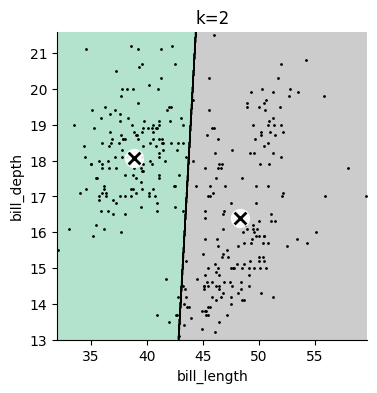

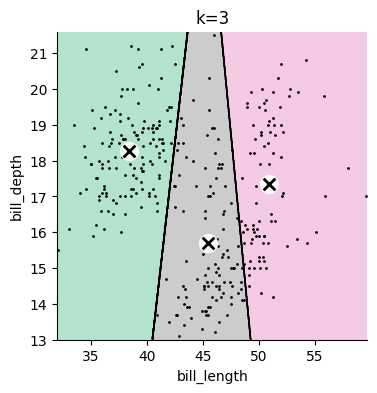

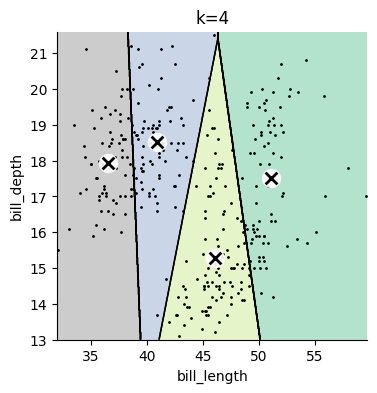

In [149]:
# Put your code here 
from sklearn.cluster import KMeans

bill_length = penguin_df['bill_length_mm'].values.reshape(-1,1)
bill_depth = penguin_df['bill_depth_mm'].values.reshape(-1,1)
flipper_length = penguin_df['flipper_length_mm'].values.reshape(-1,1)
body_mass = penguin_df['body_mass_g'].values.reshape(-1,1)

X = np.concatenate((bill_length, bill_depth), axis=1)


ks= [2,3,4]

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X)

    plt.figure(figsize=(4, 4))
    plot_decision_boundaries(kmeans, X)
    plt.title(f"k={k}")
    plt.show();

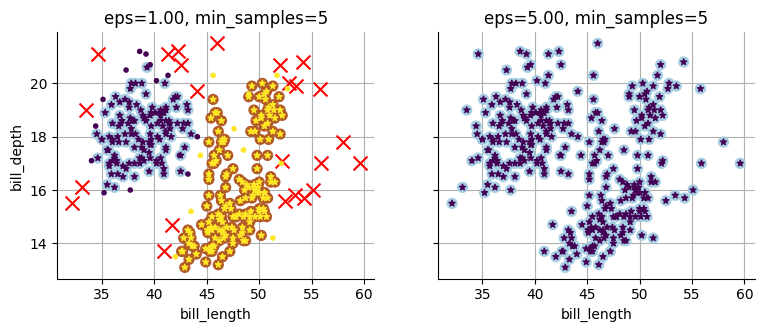

In [150]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1)
dbscan.fit(X)

dbscan2 = DBSCAN(eps=5)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=50)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=50, show_ylabels=False)

plt.show()


&#9989; **Questions: (4 points)**
- What two features best cluster the penguins dataset for K-Means and DBSCAN?
- Which estimator (DBSCAN or K-Means) you think is better?
 

1. It looks like the best features for DBSCAN are bill_depth and bill_length. For K-means, it looks like the best features are flipper_length and bill_length.
2. In general it seems like DBSCAN performs better than K-Means. This is because DBSCAN is able to find clusters of different shapes and sizes. K-Means is limited to finding spherical clusters.

&#9989; **Task: (8 points)** Now select all four features of the penguins dataset and use K-Means and DBSCAN to find clusters. 

- (6 points) Using K-Means:
    - (2 points) Make a plot of the silhouette score vs the number of clusters, _e.g._ `k = [2, 3, 4, 5]`.
    - (4 points) Then make a silhouette diagram similar to Figure 9-10 of your textbook (pg. 272). Look for code from the book's github repo or follow this [link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py).
- (2 points) Using DBSCAN: Make a plot of the silhouette score vs `eps`. 

In [151]:
X = np.concatenate((bill_length, bill_depth, flipper_length, body_mass), axis=1)

Text(0.5, 1.0, 'Silhouette Score vs. Number of K-mean Clusters')

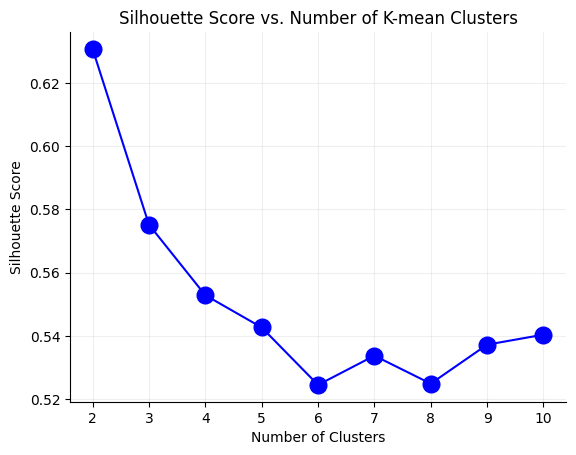

In [152]:
# Put your code here
from sklearn.metrics import silhouette_score
ks= [2,3,4,5,6,7,8,9,10]
scores = []
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X)  

    scores.append(silhouette_score(X, y_pred))

plt.plot(ks, scores, "bo-", markersize=12)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=0.2)
plt.title('Silhouette Score vs. Number of K-mean Clusters')

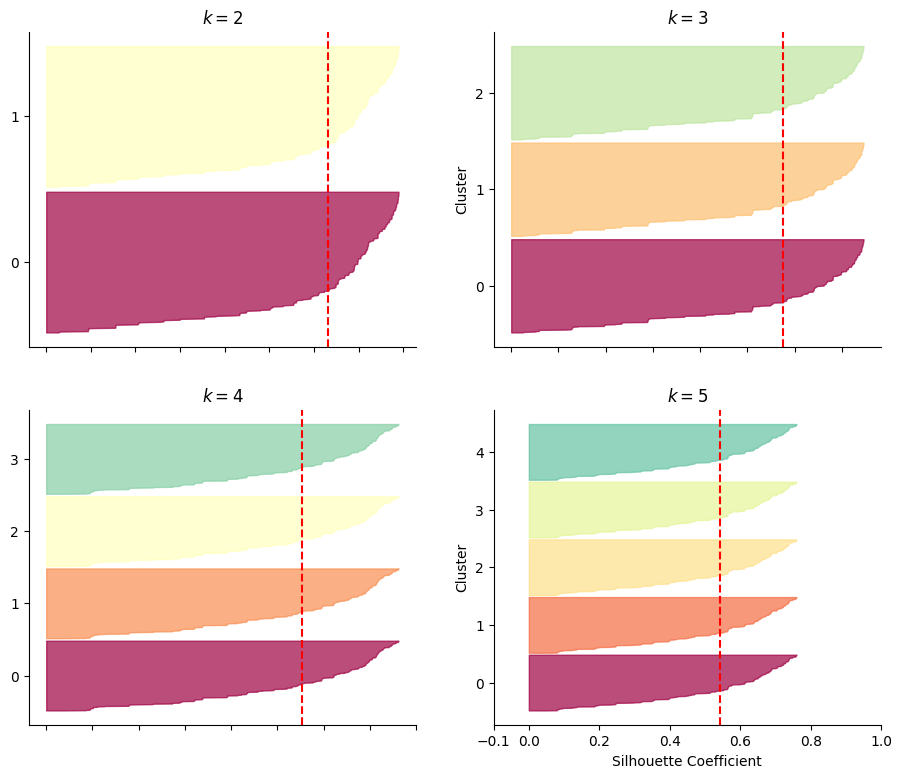

In [153]:
# extra code – this cell generates and saves Figure 9–10

from sklearn.metrics import silhouette_samples

from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X)  

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_samples(X, y_pred)
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score(X, y_pred), color="red", linestyle="--")
    plt.title(f"$k={k}$")


Text(0.5, 1.0, 'Silhouette Score vs. Eps')

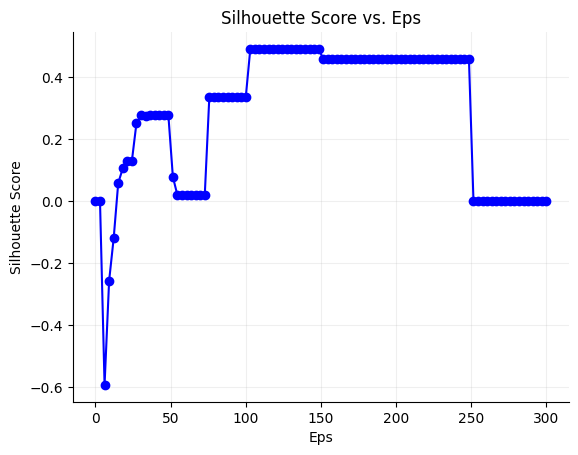

In [162]:
eps_list = np.linspace(0.01, 300, 100)
scores = []
for eps in eps_list:
    dbscan = DBSCAN(eps=eps)
    y_pred = dbscan.fit_predict(X)
    if len(np.unique(y_pred)) > 1:
        scores.append(silhouette_score(X, y_pred))
    else:
        scores.append(0)

plt.plot(eps_list, scores, "bo-", markersize=6)
plt.xlabel('Eps')
plt.ylabel('Silhouette Score')
plt.grid(alpha=0.2)
plt.title('Silhouette Score vs. Eps')
    


In [167]:
dbscan = DBSCAN(eps=100)
y_pred = dbscan.fit_predict(X)
np.unique(y_pred)


array([-1,  0,  1], dtype=int64)

&#9989; **Questions: (6 points)** 
1. What is the best `k` for K-Means ?
2. What is the best `eps` for DBSCAN ?
3. Do the number of clusters predicted by K-Means and DBSCAN agree? Which algorithm do you think is best?


1. Looking at K-means it is hard to say. The silhouette score is highest for k=2, but the silhouette diagram shows that they are all quite good.
2. The best eps for DBSCAN is around 100.
3. No DBSCAN says 3 while K-mean says 2. I would say that DBSCAN performed better here.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**


In [155]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/QyrbnptkyA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.